In [1]:
# Import modules.
import pandas as pd
import numpy.random as rnd
from MCForecastTools import MCSimulation

In [2]:
#Print the documentation of the MCSimulation module of the MCForecastTools library
?MCSimulation

Init signature:
MCSimulation(
    portfolio_data,
    weights='',
    num_simulation=1000,
    num_trading_days=252,
)
Docstring:     
A Python class for running Monte Carlo simulation on portfolio price data.

...

Attributes
----------
portfolio_data : pandas.DataFrame
    portfolio dataframe
weights: list(float)
    portfolio investment breakdown
nSim: int
    number of samples in simulation
nTrading: int
    number of trading days to simulate
simulated_return : pandas.DataFrame
    Simulated data from Monte Carlo
confidence_interval : pandas.Series
    the 95% confidence intervals for simulated final cumulative returns
Init docstring:
Constructs all the necessary attributes for the MCSimulation object.

Parameters
----------
portfolio_data: pandas.DataFrame
    DataFrame containing stock price information from Alpaca API
weights: list(float)
    A list fractions representing percentage of total investment per stock. DEFAULT: Equal distribution
num_simulation: int
    Number of simu

In [3]:
# Read in csv files

msft_df = pd.read_csv('../Resources/MSFT.csv')
aapl_df = pd.read_csv('../Resources/AAPL.csv')

In [4]:
msft_df

,date,close,volume,open,high,low
0,8/3/09,23.83,46843710,23.82,23.8600,23.5000
1,8/4/09,23.77,49116380,23.68,23.7900,23.5300
2,8/5/09,23.81,53263040,23.84,24.2500,23.7900
3,8/6/09,23.46,59655950,23.93,23.9800,23.2700
4,8/7/09,23.56,46165010,23.75,23.8200,23.5000
...,...,...,...,...,...,...
2512,7/26/19,141.34,19037600,140.37,141.6750,140.3000
2513,7/29/19,141.03,16605870,141.50,141.5100,139.3663
2514,7/30/19,140.35,16846530,140.14,141.2199,139.8005
2515,7/31/19,136.27,38598790,140.33,140.4900,135.0800


In [5]:
# Create a dictionary of the two dataframes
to_merge_dict = {'msft': msft_df , 'aapl': aapl_df}

In [6]:
# Use concat to create a merged dataframe from the dictionary
merged_df = pd.concat(to_merge_dict.values(), axis=1, keys=to_merge_dict.keys())

## Note: merged_df is a multi-indexed dataframe. 
  - The `keys` parameter allows us to pass in a list of keys that will be used for the index values
  - The `values()` method from the dictionary passes in a list of lists
  - The column names are also all lowercase which is required by MCSimulation

In [7]:
merged_df

msft                                                   aapl  \
         date   close    volume    open      high       low     date   
0      8/3/09   23.83  46843710   23.82   23.8600   23.5000   8/3/09   
1      8/4/09   23.77  49116380   23.68   23.7900   23.5300   8/4/09   
2      8/5/09   23.81  53263040   23.84   24.2500   23.7900   8/5/09   
3      8/6/09   23.46  59655950   23.93   23.9800   23.2700   8/6/09   
4      8/7/09   23.56  46165010   23.75   23.8200   23.5000   8/7/09   
...       ...     ...       ...     ...       ...       ...      ...   
2512  7/26/19  141.34  19037600  140.37  141.6750  140.3000  7/26/19   
2513  7/29/19  141.03  16605870  141.50  141.5100  139.3663  7/29/19   
2514  7/30/19  140.35  16846530  140.14  141.2199  139.8005  7/30/19   
2515  7/31/19  136.27  38598790  140.33  140.4900  135.0800  7/31/19   
2516   8/1/19  138.06  40557500  137.00  140.9383  136.9300   8/1/19   

                                                         
         close     volume      open      high       low  
0      23.7757   98285279   23.6014   23.8057   23.5529  
1      23.6500   98772690   23.5614   23.6529   23.4586  
2      23.5871  105581942   23.6786   23.9128   23.4586  
3      23.4157   85271156   23.6543   23.7871   23.2986  
4      23.6443   96727219   23.6414   23.8000   23.5429  
...        ...        ...       ...       ...       ...  
2512  207.7400   17618870  207.4800  209.7300  207.1400  
2513  209.6800   21673390  208.4600  210.6400  208.4400  
2514  208.7800   33935720  208.7600  210.1600  207.3100  
2515  213.0400   69281360  216.4200  221.3700  211.3000  
2516  208.4300   54017920  213.9000  218.0300  206.7435  

[2517 rows x 12 columns]

In [8]:
# Create a simulation object
# This portfolio will have a 20/80 split between msft and appl set in the weight parameter
# We set the number of simulations trials to be 50
# The period over which we will simulate is the number of trading days in a year times the number of years.
ten_year_simulation = MCSimulation(
    portfolio_data=merged_df,
    weights=[0.20, 0.80],
    num_simulation=50,
    num_trading_days=252*10,
)

In [9]:
ten_year_simulation.portfolio_data.head()

msft                                                       aapl           \
     date  close    volume   open   high    low daily_return    date    close   
0  8/3/09  23.83  46843710  23.82  23.86  23.50          NaN  8/3/09  23.7757   
1  8/4/09  23.77  49116380  23.68  23.79  23.53    -0.002518  8/4/09  23.6500   
2  8/5/09  23.81  53263040  23.84  24.25  23.79     0.001683  8/5/09  23.5871   
3  8/6/09  23.46  59655950  23.93  23.98  23.27    -0.014700  8/6/09  23.4157   
4  8/7/09  23.56  46165010  23.75  23.82  23.50     0.004263  8/7/09  23.6443   

                                                      
      volume     open     high      low daily_return  
0   98285279  23.6014  23.8057  23.5529          NaN  
1   98772690  23.5614  23.6529  23.4586    -0.005287  
2  105581942  23.6786  23.9128  23.4586    -0.002660  
3   85271156  23.6543  23.7871  23.2986    -0.007267  
4   96727219  23.6414  23.8000  23.5429     0.009763

In [10]:
# Run the Monte Carlo simulation to forecast the cumulative return
ten_year_simulation.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.


,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.989245,0.966804,1.028738,0.996377,0.989569,0.992102,1.006640,0.998913,0.998311,1.000139,...,1.007092,1.004412,0.976375,0.999090,0.989943,1.004083,0.986727,0.993834,1.002838,1.013322
2,1.000047,0.988000,1.023022,1.002057,1.000584,1.006033,1.014963,0.969530,0.997484,1.008150,...,1.020133,1.015220,0.963148,1.002648,1.004743,1.008071,0.985635,0.999438,1.015287,1.014463
3,0.991165,1.019514,1.024714,1.008808,1.031334,0.992720,0.991086,0.975481,0.995463,1.030160,...,1.020027,1.036279,0.977120,1.001379,1.004288,1.026017,0.998242,0.999933,1.023069,1.022516
4,0.993116,1.029019,1.011095,0.999015,1.042156,0.993567,0.984477,0.977357,0.985104,1.062244,...,1.015683,1.029900,0.964059,0.994306,1.016816,1.014306,0.985373,1.025628,1.029547,1.038165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.498412,7.004283,4.393406,25.611172,12.278246,8.085255,7.441092,3.918955,4.037518,39.925693,...,6.481192,11.029518,2.528751,6.277110,13.549090,11.866575,10.069508,6.982584,15.959870,6.427334
2517,6.382205,7.114850,4.402970,25.473223,12.540229,8.202844,7.453519,3.987086,4.080015,39.785220,...,6.506119,10.694836,2.526431,6.328612,13.464369,11.771700,10.057644,7.052060,15.772558,6.452151
2518,6.339914,7.116090,4.409959,25.678043,12.289428,8.198981,7.628655,4.010678,4.027017,39.750925,...,6.473792,10.651420,2.529044,6.467480,13.561614,11.771067,10.220158,7.120268,15.886375,6.447991
2519,6.231135,7.185324,4.371311,26.082434,12.505221,8.076867,7.508313,3.992927,4.052514,39.498827,...,6.425134,10.501677,2.516606,6.396994,13.402716,11.504025,10.353738,7.137880,15.398335,6.367679


<AxesSubplot:title={'center':'50 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

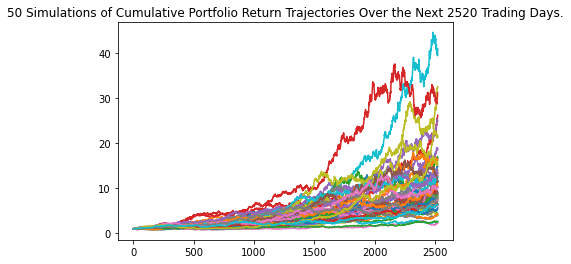

In [11]:
# Visualize the simulation by creating an
# overlay line plot
ten_year_simulation.plot_simulation()

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 50 Simulations'}, ylabel='Frequency'>

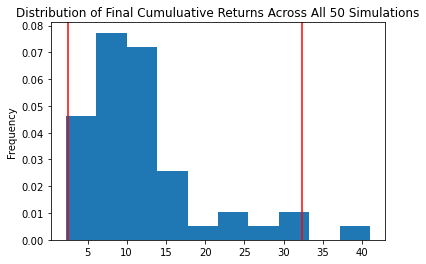

In [12]:
# Visualize distribution
ten_year_simulation.plot_distribution()

In [13]:
# Generate summary statistics from the simulation results
ten_year_simulation.summarize_cumulative_return()

count           50.000000
mean            11.753172
std              8.011013
min              2.232178
25%              6.441759
50%             10.193550
75%             13.425064
max             41.021064
95% CI Lower     2.564574
95% CI Upper    32.331989
Name: 2520, dtype: float64